In [47]:
# primero importamos las librerias, que utilizaremos.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from pandas.core.frame import DataFrame
from pandas.io.parsers import read_csv
from collections import defaultdict
import pandas as pd
from surprise import SVDpp
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict

Comienzo el proceso de EDA

Cargo los df para prepararlos para el trabajo

In [121]:
Dataframe_streamings2 = pd.read_csv ((r'C:\Users\cfari\OneDrive\Escritorio\PI_ML_OPS_CFG_2023\Dataframe_streamings2.csv'))
DF_Rating =pd.read_csv ((r'C:\Users\cfari\OneDrive\Escritorio\PI_ML_OPS_CFG_2023\DF_Rating.csv'))
DF_Rating


C:\Users\cfari\AppData\Local\Temp\ipykernel_288\1417286649.py:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  DF_Rating =pd.read_csv ((r'C:\Users\cfari\OneDrive\Escritorio\PI_ML_OPS_CFG_2023\DF_Rating.csv'))


,Unnamed: 0,userId,score,timestamp,movieIdG,movieId
0,0.0,1,1.0,1425941529,net5216,NaN
1,1.0,1,4.5,1425942435,net4230,NaN
2,2.0,1,5.0,1425941523,ama3278,NaN
3,3.0,1,5.0,1425941546,ama4934,NaN
4,4.0,1,5.0,1425941556,ama7876,NaN
...,...,...,...,...,...,...
11024284,NaN,124380,4.5,1196786159,NaN,ns5272
11024285,NaN,124380,2.5,1196786030,NaN,ns5492
11024286,NaN,124380,3.5,1196785679,NaN,hs305
11024287,NaN,124380,4.5,1196787089,NaN,ns7881


In [122]:
df_title = pd.read_csv(r'C:\Users\cfari\OneDrive\Escritorio\PI_ML_OPS_CFG_2023\Dataframe_streamings2.csv', encoding = "ISO-8859-1",index_col = 0, header = None, usecols = [0,2], names = ['show_id', 'title'])
df_title.head() 

,title
show_id,
show_id,title
s1,the grand seduction
s2,take care good night
s3,secrets of deception
s4,pink: staying true


Se detectan valores nulos.

In [58]:
DF_Rating.isnull().sum()

Unnamed: 0    1500000
userId              0
score               0
timestamp           0
movieIdG      1500000
movieId       9524289
dtype: int64

Los valores nulos se dejan como unknown (desconocidos) en ambos dataframes, para no perder informacion de clientes que pueden ser importantes.

In [90]:
DF_Rating['movieId'].fillna('0', inplace= True)
DF_Rating['movieIdG'].fillna('0', inplace= True) 
DF_Rating['Unnamed: 0'].fillna('0', inplace= True) 
DF_Rating

,Unnamed: 0,userId,score,timestamp,movieIdG,movieId
0,0.0,1,1.0,1425941529,net5216,0
1,1.0,1,4.5,1425942435,net4230,0
2,2.0,1,5.0,1425941523,ama3278,0
3,3.0,1,5.0,1425941546,ama4934,0
4,4.0,1,5.0,1425941556,ama7876,0
...,...,...,...,...,...,...
11024284,0,124380,4.5,1196786159,0,ns5272
11024285,0,124380,2.5,1196786030,0,ns5492
11024286,0,124380,3.5,1196785679,0,hs305
11024287,0,124380,4.5,1196787089,0,ns7881


In [92]:
#Reviso que no queden nulos.
DF_Rating.isnull().sum()

Unnamed: 0    0
userId        0
score         0
timestamp     0
movieIdG      0
movieId       0
dtype: int64

<AxesSubplot: xlabel='score', ylabel='count'>

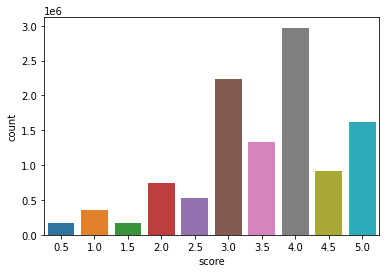

In [93]:
# visualizamos en un grafico la columna score de nuestro df DF_Rating 
sns.countplot(x='score', data= DF_Rating)

Nos damos cuenta que tenemos peliculas con alta puntuacion, intermedias y bajas, con puntuaciones que van de 5 en 5 desde 0.5 hasta 5.0, esta informacion es relevante para entrenar nuestro modelo.

Recorremos el DF para verificar la existencia de registros duplicados 

In [94]:
# Encontramos registros duplicados en nuestro dataframe, se procede a eliminar dichos registros.
#len(DF_Rating)
len(DF_Rating)-len(DF_Rating.drop_duplicates())


20

In [96]:
# Se eliminan las columnas que no serviran para la experiencia
df_rating = DF_Rating.drop(['userId', 'timestamp', 'movieIdG'], axis=1)
df_rating

,Unnamed: 0,score,movieId
0,0.0,1.0,0
1,1.0,4.5,0
2,2.0,5.0,0
3,3.0,5.0,0
4,4.0,5.0,0
...,...,...,...
11024284,0,4.5,ns5272
11024285,0,2.5,ns5492
11024286,0,3.5,hs305
11024287,0,4.5,ns7881


In [102]:
#Renombramos
df_rating= df_rating.rename(columns={'Unnamed: 0':'User'})
df_rating

,User,score,movieId
0,0.0,1.0,0
1,1.0,4.5,0
2,2.0,5.0,0
3,3.0,5.0,0
4,4.0,5.0,0
...,...,...,...
11024284,0,4.5,ns5272
11024285,0,2.5,ns5492
11024286,0,3.5,hs305
11024287,0,4.5,ns7881


In [103]:
# Guardamor el df

df_rating.to_csv('DF_Rating_test.csv')

 

In [108]:
pd.read_csv ("DF_Rating_test.csv")

,User,score,movieId
0,0.0,1.0,0
1,1.0,4.5,0
2,2.0,5.0,0
3,3.0,5.0,0
4,4.0,5.0,0
...,...,...,...
1048570,1048570.0,2.0,0
1048571,1048571.0,3.0,0
1048572,1048572.0,3.0,0
1048573,1048573.0,1.0,0


In [109]:
# verifico los tipos de datos de mi dataframe
df_rating.dtypes

User        object
score      float64
movieId     object
dtype: object

Machine Learning 

Habiendo importado la librería surprise previamente, procedemos a dar el formato correspondiente a nuestro DF para trabajar con dicha librería.


In [110]:
reader = Reader()
    

In [112]:
# Se limita el dataset a N_filas
N_filas = 100000 

data = Dataset.load_from_df (df_rating[['User', 'movieId', 'score']][:N_filas], reader)  


In [113]:
# Separamos nuestros datos
trainset, testset = train_test_split(data, test_size=.25)

In [170]:
# Usaremos un modelo de Singular Value Decomposition
from surprise import SVD
model = SVD()

In [115]:
# Predecimos
model.fit(trainset)

In [116]:
predictions = model.test(testset)

In [117]:
predictions[1]

Prediction(uid=26711.0, iid='0', r_ui=5.0, est=3.5478146216449225, details={'was_impossible': False})

In [129]:
# Hacemos una predicción al azar para usuario y película
model.predict(1328945,28)

Prediction(uid=1328945, iid=28, r_ui=None, est=3.52908, details={'was_impossible': False})

In [161]:
# Tomaremos un usuario para hacerle una recomendación

usuario = 1048570
rating = 5  # Tomamos películas a las que haya calificado con 4 o 5 estrellas
df_user = df_rating[(df_rating['User'] == usuario) & (df_rating['score'] >= rating)]
df_user = df_user.reset_index(drop=True)
df_user['title'] = df_title['title'].loc[df_user.movieId].values
df_user

,User,score,movieId,title


In [171]:
recomendaciones_usuario = df_title.iloc[:4499].copy()
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 1)


,title
show_id,
show_id,title
s1,the grand seduction
s2,take care good night
s3,secrets of deception
s4,pink: staying true


In [163]:
# Se extraen las películas que ya ha visto

usuario_vistas = df_rating[df_rating['User'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(1, 3)


,User,score,movieId
1048570,1048570.0,2.0,0


**Evaluación**

In [165]:
from surprise import accuracy

accuracy.rmse(predictions)

RMSE: 1.0277


1.0277318614433963

In [169]:
# Generamos el archivo csv con las predicciones para la entrega
pd.DataFrame(predictions).to_csv('cfg.csv', index=False, header = False)